In [1]:
import numpy as np 
import pandas as pd
import datetime as DT
import matplotlib as mlab

import calendar
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Cargamos los dataframes con los CSVs de Navent

fiuba1 = pd.read_csv('../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero = pd.read_csv('../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('../datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('../datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('../datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('../datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [3]:

datos_postulantes = pd.merge(fiuba1, postulantes_genero, on='idpostulante')

vistas=vistas.rename(index=str,columns={"idAviso": "idaviso", "timestamp": "fechapostulacion"} )
postulaciones_y_vistas = postulaciones.append(vistas)
vistas_con_datos_postulanes = pd.merge(vistas, datos_postulantes, on='idpostulante')
postulaciones_con_datos_postulantes = pd.merge(postulaciones, datos_postulantes, on='idpostulante')
postulaciones_y_vistas_con_datos_postulanes = pd.merge(postulaciones_y_vistas, datos_postulantes, on='idpostulante')

datos_avisos_con_postulantes = pd.merge(postulaciones_con_datos_postulantes, avisos_detalle, on = 'idaviso',how='right')
datos_avisos_con_vistas = pd.merge(vistas_con_datos_postulanes, avisos_detalle, on = 'idaviso',how='right')
datos_avisos_con_postulantes_y_vistas = pd.merge(postulaciones_y_vistas_con_datos_postulanes, avisos_detalle, on = 'idaviso',how='right')

In [4]:
#Las empresas con mas postulaciones por publicacion
empresas_postulaciones = datos_avisos_con_postulantes.groupby(['denominacion_empresa']).agg({'idpostulante':['count'], 'idaviso':['count']})
empresas_postulaciones.reset_index(level=0, inplace=True)
empresas_postulaciones=empresas_postulaciones.loc[empresas_postulaciones['idaviso']['count']>2295] #filtro los que tienen pocos avisos. El 2295 viene de redondear hacia arriba el 1% del valor del de mas avisos
empresas_con_cantidad_p=empresas_postulaciones.assign(f = empresas_postulaciones[('idpostulante','count')] / empresas_postulaciones[('idaviso','count')]).sort_values(['f',('idaviso','count')], ascending=False)
empresas_con_cantidad_p['f'] = empresas_con_cantidad_p['f'].apply(lambda x: round(x,4))
empresas_con_cantidad_p=empresas_con_cantidad_p.loc[empresas_con_cantidad_p['f']>0.996]
empresas_con_cantidad_p.columns=['postulaciones','cantidad postulantes','cantidad avisos','Promedio de postulaciones y/o vistas por aviso']
empresas_con_cantidad_p



,postulaciones,cantidad postulantes,cantidad avisos,Promedio de postulaciones y/o vistas por aviso
1010,Focalizar Capital Humano,23468,23468,1.0000
1558,MO&PC Collections Argentina S.R.L,22607,22607,1.0000
831,Eclecsis Recursos Humanos,15901,15901,1.0000
1423,LESEDIFE S A,13012,13012,1.0000
2053,Roilands Real Estate,12859,12859,1.0000
1760,OSDEPYM,11538,11538,1.0000
1709,Naranja,10928,10928,1.0000
677,DISTRIBUIDORA ELECTRO SUR,10710,10710,1.0000
2220,Solintar,10283,10283,1.0000
2490,Yel Informática,9507,9507,1.0000


In [5]:
#Las empresas con mas vistas por publicacion
empresas_vistas = datos_avisos_con_vistas.groupby(['denominacion_empresa']).agg({'idpostulante':['count'], 'idaviso':['count']})
empresas_vistas.reset_index(level=0, inplace=True)
empresas_vistas=empresas_vistas.loc[empresas_vistas['idaviso']['count']>2295] #filtro los que tienen pocos avisos. El 2295 viene de redondear hacia arriba el 1% del valor del de mas avisos
empresas_con_cantidad_v=empresas_vistas.assign(f = empresas_vistas[('idpostulante','count')] / empresas_vistas[('idaviso','count')]).sort_values(['f',('idaviso','count')], ascending=False)
empresas_con_cantidad_v['f'] = empresas_con_cantidad_v['f'].apply(lambda x: round(x,4))
empresas_con_cantidad_v=empresas_con_cantidad_v.loc[empresas_con_cantidad_v['f']>0.996]
empresas_con_cantidad_v.columns=['vistas','cantidad postulantes','cantidad avisos','Promedio de postulaciones y/o vistas por aviso']
empresas_con_cantidad_v

,vistas,cantidad postulantes,cantidad avisos,Promedio de postulaciones y/o vistas por aviso
2021,Remax,5744,5744,1.0000
1760,OSDEPYM,5461,5461,1.0000
1022,Frávega,4993,4993,1.0000
2396,Universidad de Palermo,4576,4576,1.0000
1602,Mar-Cal,4551,4551,1.0000
495,Cat Technologies Argentina,4006,4006,1.0000
873,Enfoque Humano,3940,3940,1.0000
1047,GEDYT SA,3798,3798,1.0000
958,FF Consultores s.a.,3483,3483,1.0000
502,Cencosud S.A.,3399,3399,1.0000


In [6]:
#Las empresas con mas vistas+postulaciones por publicacion
empresas_vistas_y_postulaciones = datos_avisos_con_postulantes_y_vistas.groupby(['denominacion_empresa']).agg({'idpostulante':['count'], 'idaviso':['count']})
empresas_vistas_y_postulaciones.reset_index(level=0, inplace=True)
empresas_vistas_y_postulaciones=empresas_vistas_y_postulaciones.loc[empresas_vistas_y_postulaciones['idaviso']['count']>2295] #filtro los que tienen pocos avisos. El 2295 viene de redondear hacia arriba el 1% del valor del de mas avisos
empresas_con_cantidad_vp=empresas_vistas_y_postulaciones.assign(f = empresas_vistas_y_postulaciones[('idpostulante','count')] / empresas_vistas_y_postulaciones[('idaviso','count')]).sort_values(['f',('idaviso','count')], ascending=False)
empresas_con_cantidad_vp['f'] = empresas_con_cantidad_vp['f'].apply(lambda x: round(x,4))
empresas_con_cantidad_vp=empresas_con_cantidad_vp.loc[empresas_con_cantidad_vp['f']>0.996]
empresas_con_cantidad_vp.columns=['vistas y postulaciones','cantidad postulantes','cantidad avisos','Promedio de postulaciones y/o vistas por aviso']
empresas_con_cantidad_vp

,vistas y postulaciones,cantidad postulantes,cantidad avisos,Promedio de postulaciones y/o vistas por aviso
204,Atento,33008,33008,1.0000
1025,Fundación Favaloro,32805,32805,1.0000
281,Banco Columbia SA,31926,31926,1.0000
1010,Focalizar Capital Humano,29687,29687,1.0000
1136,Gobierno de la Ciudad de Buenos Aires,28559,28559,1.0000
1558,MO&PC Collections Argentina S.R.L,27008,27008,1.0000
1022,Frávega,25664,25664,1.0000
995,Farmacias Central Oeste,24312,24312,1.0000
1964,RED LINK SA,20460,20460,1.0000
2396,Universidad de Palermo,19664,19664,1.0000


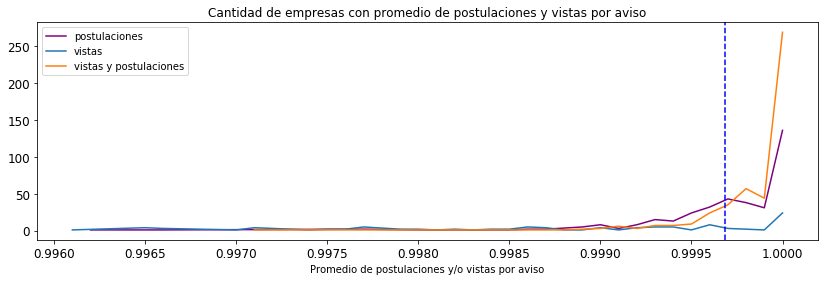

In [8]:
ax = empresas_con_cantidad_p.groupby(['Promedio de postulaciones y/o vistas por aviso']).count()['postulaciones'].plot(kind='line', rot = 90, figsize=(14,4), color='purple' ,fontsize=12, title='Cantidad de empresas con promedio de postulaciones y vistas por aviso',grid=True)
empresas_con_cantidad_v.groupby(['Promedio de postulaciones y/o vistas por aviso']).count()['vistas'].plot(ax=ax)
empresas_con_cantidad_vp.groupby(['Promedio de postulaciones y/o vistas por aviso']).count()['vistas y postulaciones'].plot(ax=ax)
f_promedio = empresas_con_cantidad_p['Promedio de postulaciones y/o vistas por aviso'].mean()
ax.axvline(f_promedio, color='b', linestyle='--')
ax.legend()
ax.figure.savefig('empresas_con_promedio_post_sobre_avisos.png')
